In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [2]:
folder_path = os.getcwd()
data_path = os.path.join(folder_path, "mnist-original.mat")

In [3]:
mnist_raw = loadmat(data_path)

In [4]:
mnist_raw.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])

In [6]:
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}

In [7]:
import numpy as np
print(np.unique(mnist["target"]))  

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], test_size=0.2)

Lable :  {8.0}


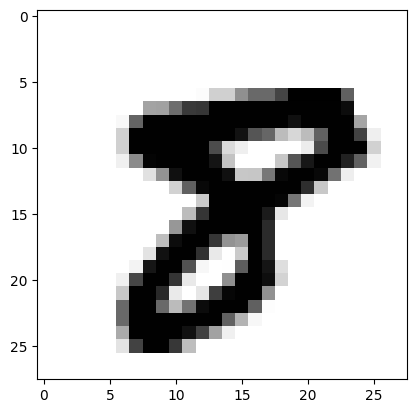

In [11]:
target = 51615
number = mnist["data"][target]
print("Lable : " ,{mnist["target"][target]})
number_image = number.reshape(28,28)
plt.imshow(number_image,cmap=plt.cm.binary,interpolation="nearest")
plt.show()

In [12]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [13]:
X_train.shape

(56000, 784)

In [14]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(784,)), # 28 * 28
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=10, activation='softmax')  
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model   

In [17]:
import pandas as pd

def train_model(model, feature, label, epochs, batch_size , checkpoint_filepath ='best_model.keras'):

  model_checkpoint_callback = ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True)

  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs,
                      callbacks=[model_checkpoint_callback])

  epochs = history.epoch
  print("Finished training the model.")
  print(history.history.keys())
  return  history , model

print("Defined build_model and train_model")

Defined build_model and train_model


In [18]:
print(f"Feature size: {len(X_train)}, Label size: {len(y_train)}")

Feature size: 56000, Label size: 56000


In [19]:
epochs = 10
my_batch_size = 256

my_model = build_model()
history, model = train_model(my_model, X_train, y_train, epochs, my_batch_size)

d:\Anaconda\envs\Deep-l\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7795 - loss: 0.8064
Epoch 2/10
 29/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9329 - loss: 0.2478

d:\Anaconda\envs\Deep-l\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9383 - loss: 0.2232
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9560 - loss: 0.1590
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9641 - loss: 0.1281
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9710 - loss: 0.1011
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9760 - loss: 0.0853
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9807 - loss: 0.0712
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9813 - loss: 0.0649
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9850 - loss: 0.0555
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9862 - loss: 0.0493
Finished training the model.
dict_keys(['accuracy', 'loss'])


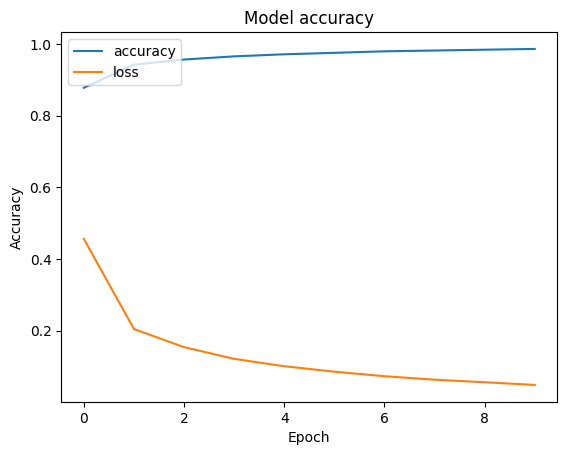

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


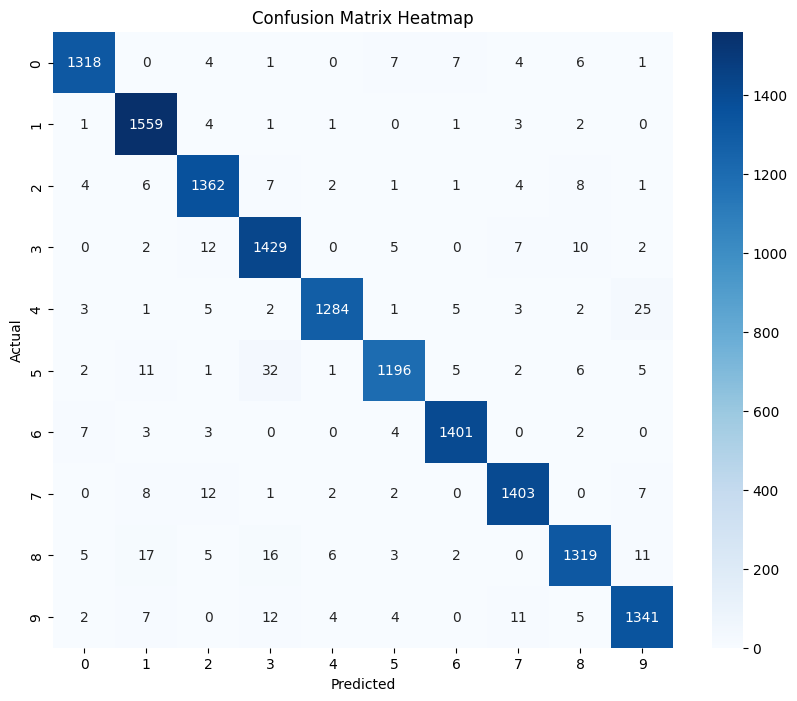

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9821    0.9777    0.9799      1348
         1.0     0.9659    0.9917    0.9787      1572
         2.0     0.9673    0.9756    0.9715      1396
         3.0     0.9520    0.9741    0.9629      1467
         4.0     0.9877    0.9647    0.9761      1331
         5.0     0.9779    0.9485    0.9630      1261
         6.0     0.9852    0.9866    0.9859      1420
         7.0     0.9763    0.9777    0.9770      1435
         8.0     0.9699    0.9530    0.9614      1384
         9.0     0.9627    0.9675    0.9651      1386

    accuracy                         0.9723     14000
   macro avg     0.9727    0.9717    0.9721     14000
weighted avg     0.9724    0.9723    0.9723     14000



In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


y_pred = my_model.predict(X_test).argmax(axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(class_report)

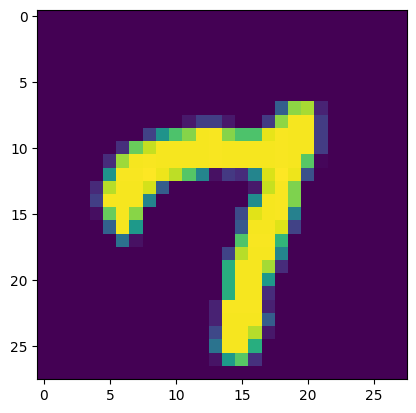

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted label: 7
Lable :  {7.0}


In [24]:
target = 45482
number = mnist["data"][target]
number_image = number.reshape(28, 28)
plt.imshow(number_image, interpolation="nearest")
plt.show()

number = number.astype('float32') / 255.0
number = number.reshape(1, 784)
prediction = my_model.predict(number).argmax(axis=1)
print(f"Predicted label: {prediction[0]}")
print("Lable : " ,{mnist["target"][target]})